## Challenge

Do a little scraping or API-calling of your own.  Pick a new website and see what you can get out of it.  Expect that you'll run into bugs and blind alleys, and rely on your mentor to help you get through.  

Formally, your goal is to write a scraper that will:

1) Return specific pieces of information (rather than just downloading a whole page)  
2) Iterate over multiple pages/queries  
3) Save the data to your computer  

Once you have your data, compute some statistical summaries and/or visualizations that give you some new insights into your scraping topic of interest.  Write up a report from scraping code to summary and share it with your mentor.

## Scraping the Pokemon Database

In [50]:
import requests
import lxml.html as lh
import pandas as pd
import seaborn as sns

In [31]:
url='http://pokemondb.net/pokedex/all'

#Create a handle, page, to handle the contents of the website
page = requests.get(url)

#Store the contents of the website under doc
doc = lh.fromstring(page.content)

#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')

In [37]:
#parse the first row as the header
tr_elements = doc.xpath('//tr')

#Create empty list
col=[]
i=0

#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print('%d:"%s"' %(i,name))
    col.append((name,[]))

1:"#"
2:"Name"
3:"Type"
4:"Total"
5:"HP"
6:"Attack"
7:"Defense"
8:"Sp. Atk"
9:"Sp. Def"
10:"Speed"


In [38]:
#Since out first row is the header, data is stored on the second row onwards
for j in range(1,len(tr_elements)):
    #T is our j'th row
    T=tr_elements[j]
    
    #If row is not of size 10, the //tr data is not from our table 
    if len(T)!=10:
        break
    
    #i is the index of our column
    i=0
    
    #Iterate through each element of the row
    for t in T.iterchildren():
        data=t.text_content() 
        #Check if row is empty
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

In [39]:
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

In [40]:
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,004,Charmander,Fire,309,39,52,43,60,50,65


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 10 columns):
#          1028 non-null object
Name       1028 non-null object
Type       1028 non-null object
Total      1028 non-null int64
HP         1028 non-null int64
Attack     1028 non-null int64
Defense    1028 non-null int64
Sp. Atk    1028 non-null int64
Sp. Def    1028 non-null int64
Speed      1028 non-null int64
dtypes: int64(7), object(3)
memory usage: 80.4+ KB


In [42]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,437.571984,69.577821,80.119650,74.475681,72.732490,72.132296,68.534047
std,121.664910,26.385849,32.372321,31.303309,32.677698,28.083684,29.802103
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,330.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000
50%,455.000000,66.500000,76.000000,70.000000,65.000000,70.000000,65.000000
75%,510.000000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000


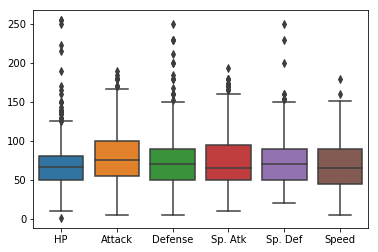

In [56]:
df = df.drop(['#', 'Total'],1)

sns.boxplot(data=df)

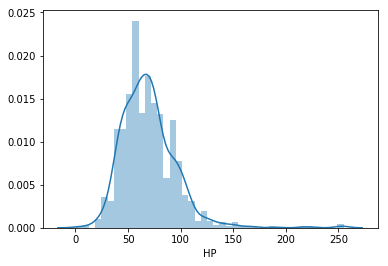

In [51]:
sns.distplot(df['HP'])

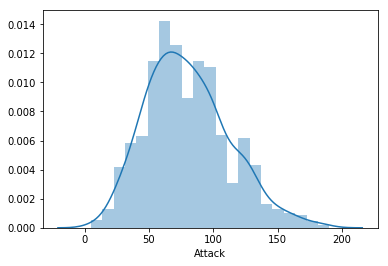

In [52]:
sns.distplot(df['Attack'])

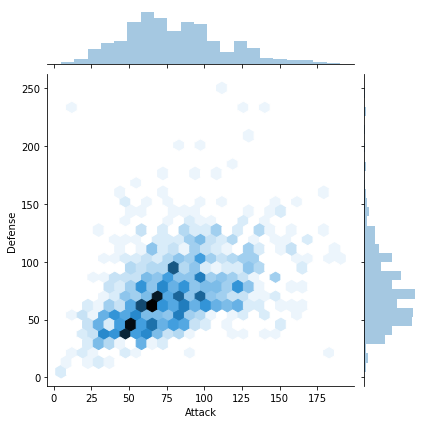

In [53]:
sns.jointplot(x='Attack', y='Defense', data=df, kind='hex')

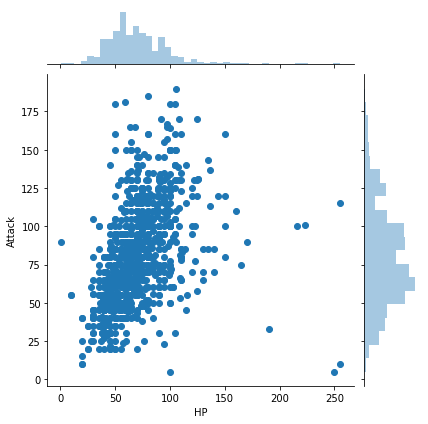

In [54]:
sns.jointplot(x="HP", y="Attack", data=df)